In [55]:
# Packages required for operations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [56]:
# Read data

df = pd.read_csv("/Users/mac/Desktop/neo4j_rahul_With/Data_Exploration/cypher_data.csv")

In [57]:
df.dropna(inplace=True) #drop Null values from data
df.reset_index(inplace=True) #Reset indexes

## PLOTS

### Histogram

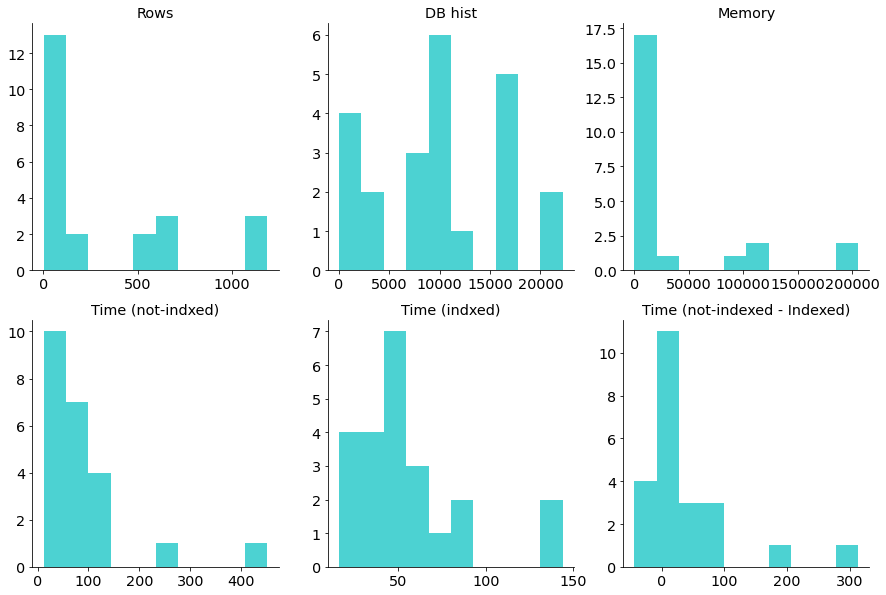

In [58]:
# Parameters for Manual tuning of the graph
rcParams['figure.figsize']= 15,10
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color='c')
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['lines.linestyle'] = '--'

# Plot Histograms

# rows
plt.subplot(2,3,1)
plt.hist(df['Rows'], alpha=0.7)
plt.title('Rows')
# DB-hits
plt.subplot(2,3,2)
plt.hist(df['DB_hits'], alpha=0.7)
plt.title('DB hist')
# Memory
plt.subplot(2,3,3)
plt.hist(df['Memory'], alpha=0.7)
plt.title('Memory')
# Time (not indexed)
plt.subplot(2,3,4)
plt.hist(df['time_not_ind'], alpha=0.7)
plt.title('Time (not-indxed)')
# Time (indexed)
plt.subplot(2,3,5)
plt.hist(df['time_ind'], alpha=0.7)
plt.title('Time (indxed)')
# Time (difference)
plt.subplot(2,3,6)
plt.hist(df['time(not_ind-ind)'], alpha=0.7)
plt.title('Time (not-indexed - Indexed)')

plt.show()

### Correlation matrix

In [59]:
df1 = df.drop(['Query', 'Cache_memory'], axis=1) #drop unnecessary columns

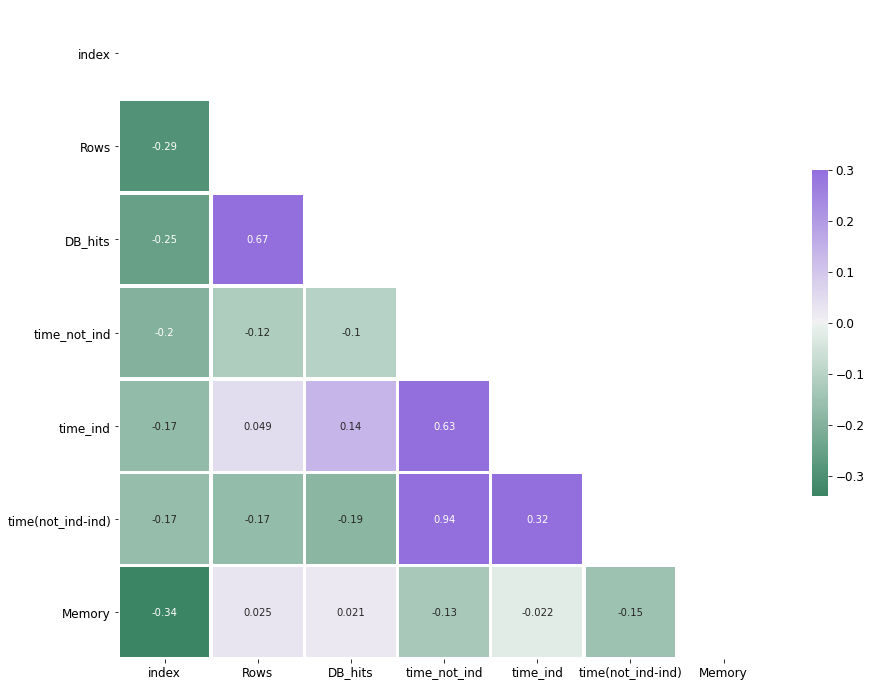

<Figure size 1080x720 with 0 Axes>

In [60]:
# Parameters for manual tuning
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# correlation matrix
corr = df1.corr()

# mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# heat map using above defined things
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=2.5, cbar_kws={"shrink": .5}, annot=True )

plt.show()
plt.tight_layout()

### Box Plots

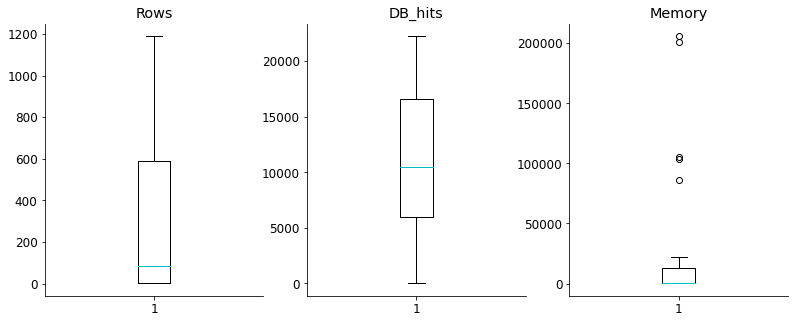

In [61]:
# Parameters for manual tuning
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'


# Figure size and Subplot layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(7, 5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)

# Build box plots

# rows
ax1.boxplot(df.Rows)
ax1.set_title('Rows')
# DB-hits
ax2.boxplot(df.DB_hits)
ax2.set_title('DB_hits')
# Memory
ax3.boxplot(df.Memory)
ax3.set_title('Memory')

# Add horizontal grid lines
ax.yaxis.grid(True)

# Show the plot
plt.show()


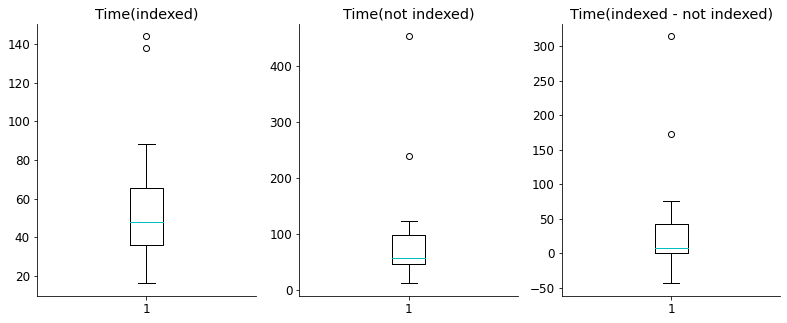

In [62]:
# Figure Size
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(7, 5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)

# Build box plots
ax4.boxplot(df.time_ind)
ax4.set_title('Time(indexed)')

ax5.boxplot(df.time_not_ind)
ax5.set_title('Time(not indexed)')

ax6.boxplot(df['time(not_ind-ind)'])
ax6.set_title('Time(indexed - not indexed)')

# Add horizontal grid lines
ax.yaxis.grid(True)

# show the plot
plt.show()


### Violin Plots

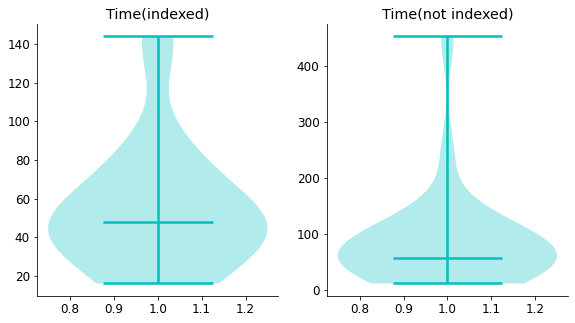

In [63]:
# Create figure with three axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)


# Plot violin plot on axes 1
ax1.violinplot(df.time_ind, showmedians=True)
ax1.set_title('Time(indexed)')

# Plot violin plot on axes 2
ax2.violinplot(df.time_not_ind, showmedians=True)
ax2.set_title('Time(not indexed)')


#fig.suptitle('Violin PLots', fontsize=20)
plt.show()

### Scatter Plots

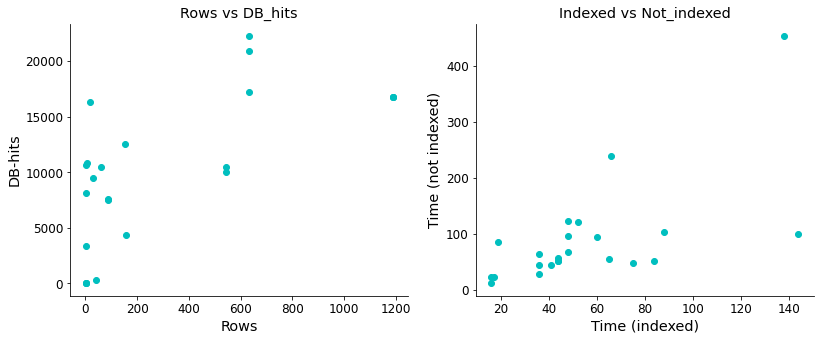

In [64]:
# Parameters
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# Size of figure 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)

# Plot on axes 1
ax1.scatter(x = df.Rows, y= df.DB_hits)
ax1.set_xlabel("Rows")
ax1.set_ylabel("DB-hits")
ax1.set_title('Rows vs DB_hits')

# Plot on axes 2
ax2.scatter(x = df.time_ind, y= df.time_not_ind)
ax2.set_xlabel("Time (indexed)")
ax2.set_ylabel("Time (not indexed)")
ax2.set_title('Indexed vs Not_indexed')

plt.show()

## Linear Regression for Comaprison purpose

### (1) y= time_ind

In [65]:
linear_model = LinearRegression()

In [169]:
df_model_index = df.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_not_ind'], axis=1)
df_model_index.head()

,Rows,DB_hits,time_ind,Memory
0,545.0,10521.0,19.0,205772.0
1,31.0,9443.0,52.0,22496.0
2,3.0,10674.0,36.0,444.0
3,155.0,4331.0,60.0,86392.0
4,5.0,10823.0,48.0,2824.0


In [74]:
x_index = df_model_index.drop('time_ind', axis=1)
y_index = np.array(df_model_index.time_ind)

In [127]:
x_test = np.array(x_index.iloc[-1]).reshape(1,-1)    #data point with Profiling
x_train = np.array(x_index.iloc[:-1,:])              # datapoints without Profiling

In [128]:
y_test = y_index[-1]
y_train = y_index[:-1]

In [139]:
lm = linear_model.fit(x_train, y_train)

In [141]:
lm.predict(x_test) # Expected

array([44.45280329])

In [142]:
y_test #Actual

65.0

### (2) y= time_not_ind

In [170]:
df_model_not_index = df.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_ind'], axis=1)
df_model_not_index.head()

,Rows,DB_hits,time_not_ind,Memory
0,545.0,10521.0,86.0,205772.0
1,31.0,9443.0,121.0,22496.0
2,3.0,10674.0,64.0,444.0
3,155.0,4331.0,95.0,86392.0
4,5.0,10823.0,96.0,2824.0


In [163]:
x_not_index = df_model_not_index.drop('time_not_ind', axis=1)
y_not_index = np.array(df_model_not_index.time_not_ind)

In [164]:
x_test_not = np.array(x_not_index.iloc[-1]).reshape(1,-1)    #data point with Profiling
x_train_not = np.array(x_not_index.iloc[:-1,:])              # datapoints without Profiling

y_test_not = y_not_index[-1]
y_train_not = y_not_index[:-1]

In [166]:
lm.fit(x_train_not, y_train_not)

LinearRegression()

In [167]:
lm.predict(x_test_not)

array([113.80456025])

In [168]:
y_test_not

56.0